In [ ]:
# Machine Learning Workflows for Various Datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits, load_iris
from sklearn.feature_extraction.text import TfidfVectorizer


--- Loan Prediction ---
MSE: 2949.177397114172
R2 Score: 0.45281768959840285


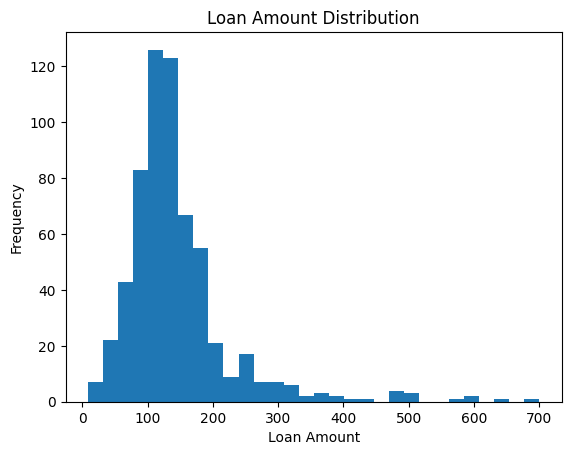

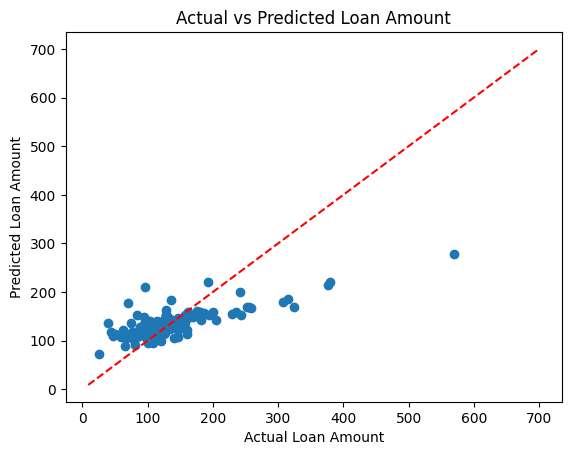

In [ ]:
# i) Loan Amount Prediction
print("\n--- Loan Prediction ---")
loan_train = pd.read_csv("/train_u6lujuX_CVtuZ9i.csv")
loan_test = pd.read_csv("/test_Y3wMUE5_7gLdaTN.csv")
loan_train.fillna(loan_train.mean(numeric_only=True), inplace=True)
loan_train = pd.get_dummies(loan_train.drop(['Loan_ID'], axis=1), drop_first=True)

X = loan_train.drop("LoanAmount", axis=1)
y = loan_train["LoanAmount"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_new = SelectKBest(score_func=f_regression, k=10).fit_transform(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualizations
plt.hist(loan_train['LoanAmount'].dropna(), bins=30)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


--- Handwritten Digit Recognition ---
Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.93      1.00      0.96        55
           2       0.98      1.00      0.99        53
           3       1.00      0.95      0.97        55
           4       0.98      0.96      0.97        54
           5       0.95      0.98      0.96        55
           6       1.00      0.98      0.99        54
           7       0.96      1.00      0.98        54
           8       0.96      0.88      0.92        52
           9       0.96      0.98      0.97        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



<Figure size 640x480 with 0 Axes>

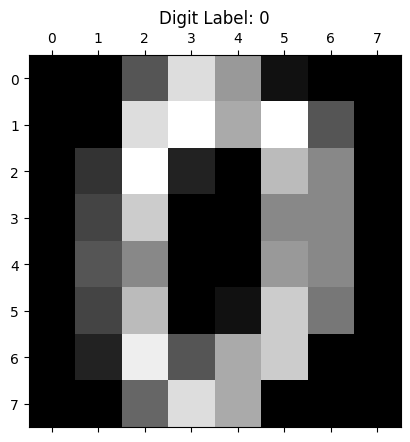

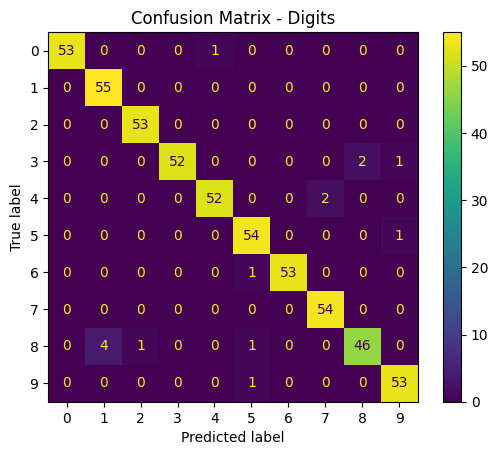

In [ ]:
# ii) Handwritten Digit Recognition
print("\n--- Handwritten Digit Recognition ---")
digits = load_digits()
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Digit Image Visualization
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Digit Label: {digits.target[0]}")
plt.show()

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix - Digits")
plt.show()


--- Email Spam Classification ---
Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



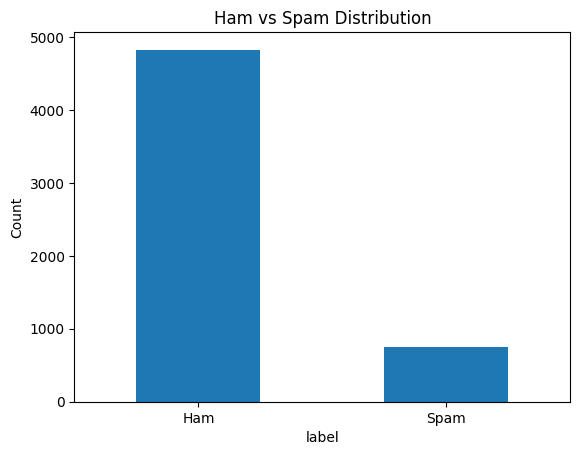

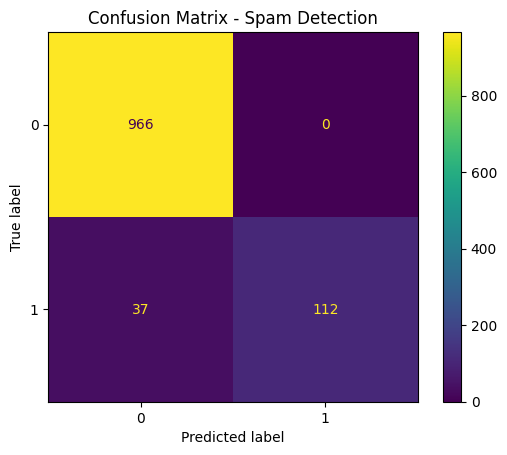

In [ ]:
# iii) Spam Email Classification
print("\n--- Email Spam Classification ---")
spam_df = pd.read_csv("/spam.csv", encoding="latin-1")[["v1", "v2"]]
spam_df.columns = ["label", "message"]
spam_df['label'] = spam_df['label'].map({"ham": 0, "spam": 1})
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(spam_df['message'])
y = spam_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Spam Distribution
spam_df['label'].value_counts().plot(kind='bar')
plt.title("Ham vs Spam Distribution")
plt.xticks([0,1], ['Ham', 'Spam'], rotation=0)
plt.ylabel("Count")
plt.show()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Spam Detection")
plt.show()


--- Diabetes Prediction ---
Accuracy: 0.7077922077922078
[[83 17]
 [28 26]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.60      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



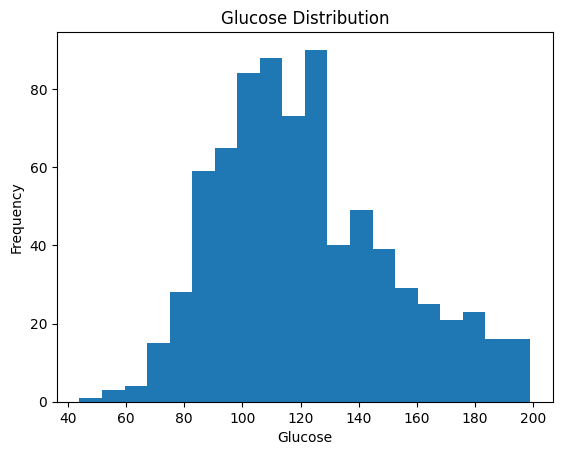

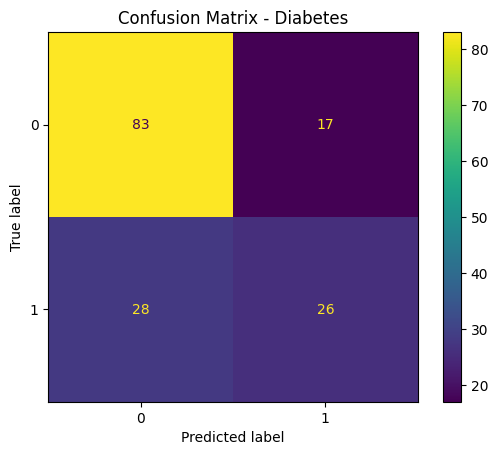

In [ ]:
# iv) Predicting Diabetes
print("\n--- Diabetes Prediction ---")
diabetes = pd.read_csv("/diabetes.csv")
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols_with_zero] = diabetes[cols_with_zero].replace(0, np.nan)
diabetes.fillna(diabetes.mean(numeric_only=True), inplace=True)
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Glucose Histogram
plt.hist(diabetes['Glucose'].dropna(), bins=20)
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Diabetes")
plt.show()


--- Iris Dataset Classification ---
Accuracy: 0.9333333333333333
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



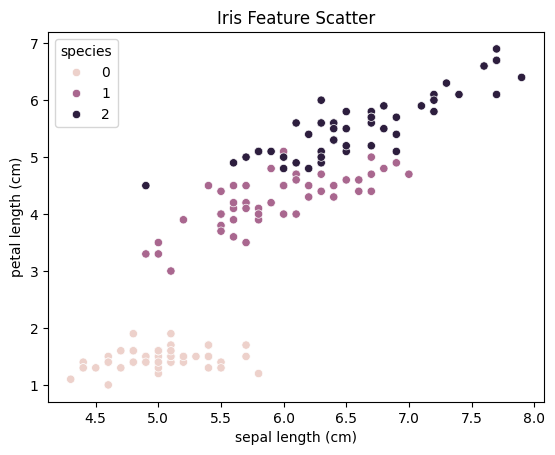

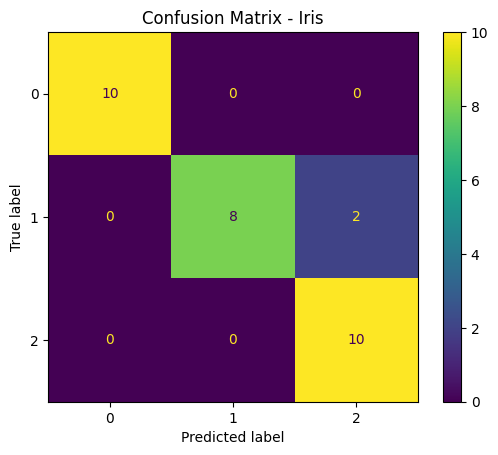

In [ ]:
# v) Iris Dataset Classification
print("\n--- Iris Dataset Classification ---")
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Iris Feature Scatter Plot
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title("Iris Feature Scatter")
plt.show()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Iris")
plt.show()